In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from itertools import islice, cycle

In [6]:
data_path = './data/'

quarterly_df = pd.read_csv(f'{data_path}spotify-quarterly.csv')
apk_df = pd.read_csv(f'{data_path}apk.csv', parse_dates=['Date'])

# Quarterly data

We create a ```Data``` field to store in a single value the information about year and quarter.

In [3]:
quarterly_df['Date'] = quarterly_df['Year'].astype(str) + '– Q' + quarterly_df['Quarter'].astype(str)
quarterly_df = quarterly_df.sort_values('Date')

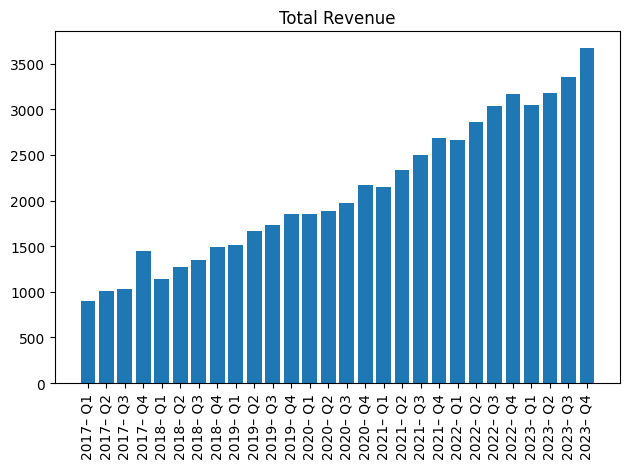

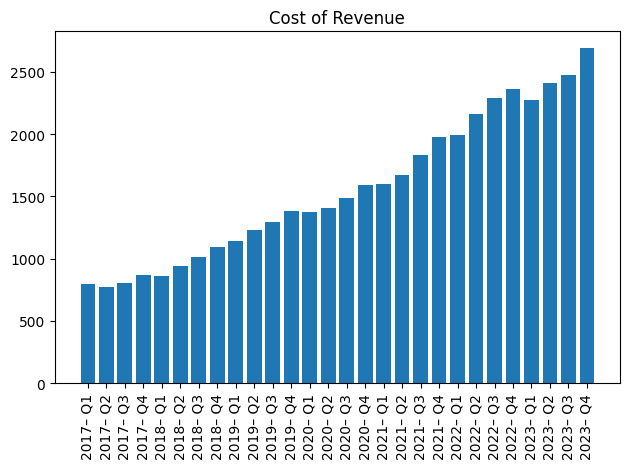

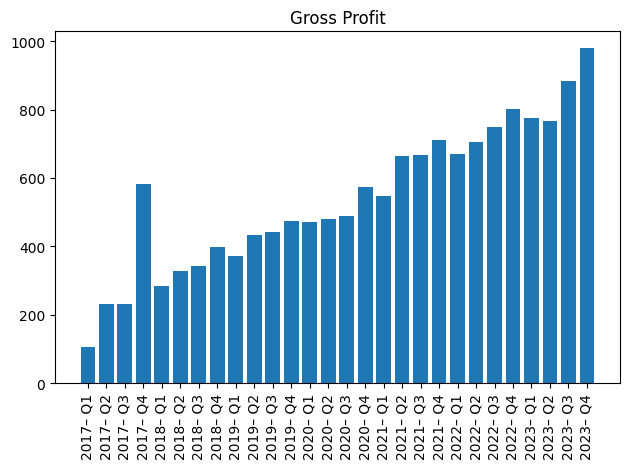

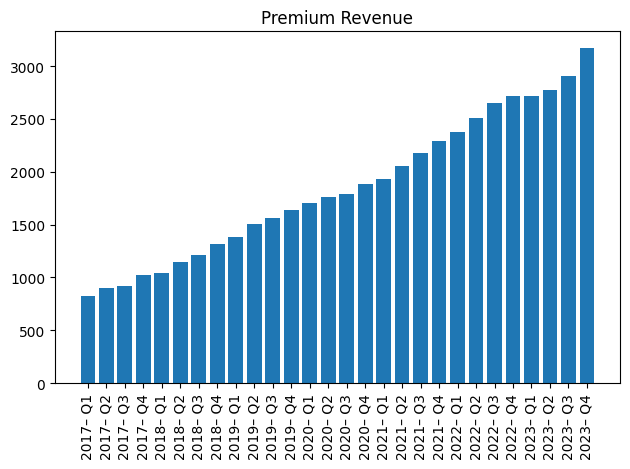

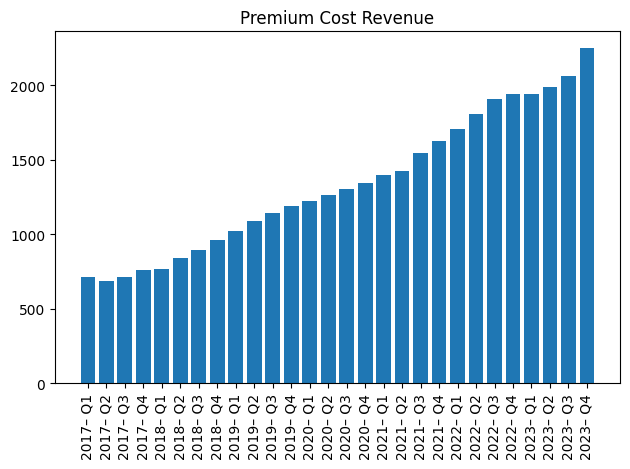

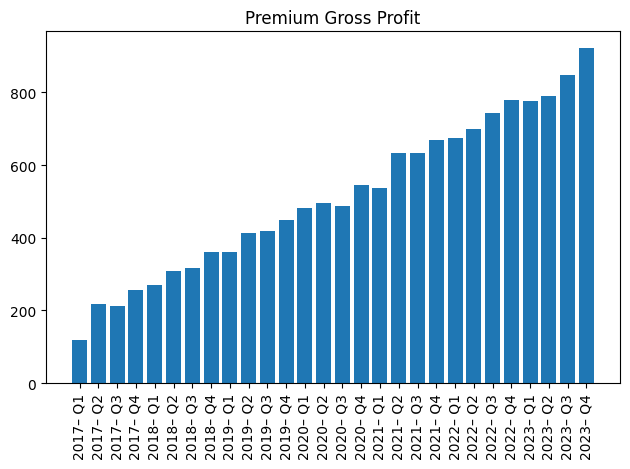

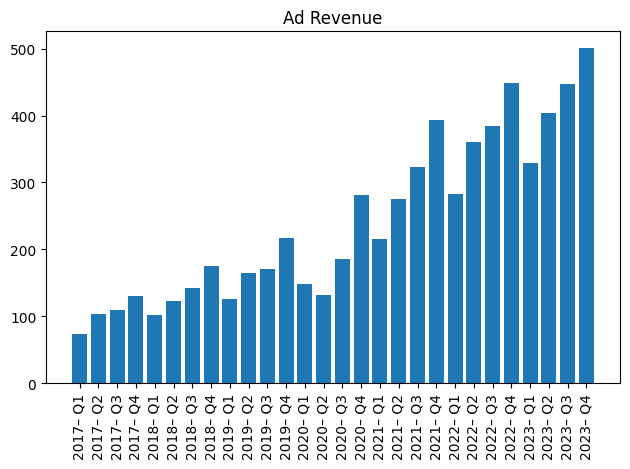

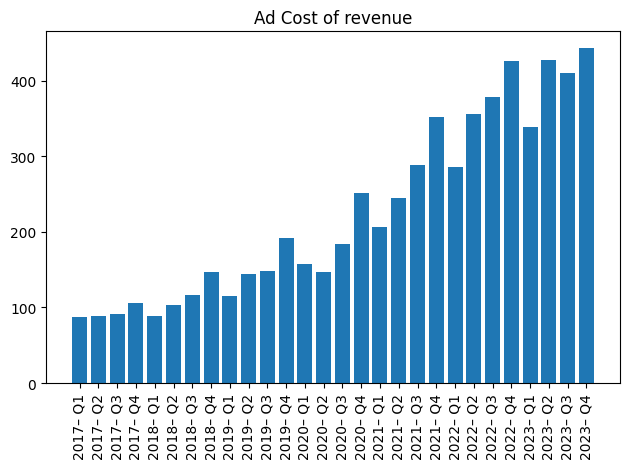

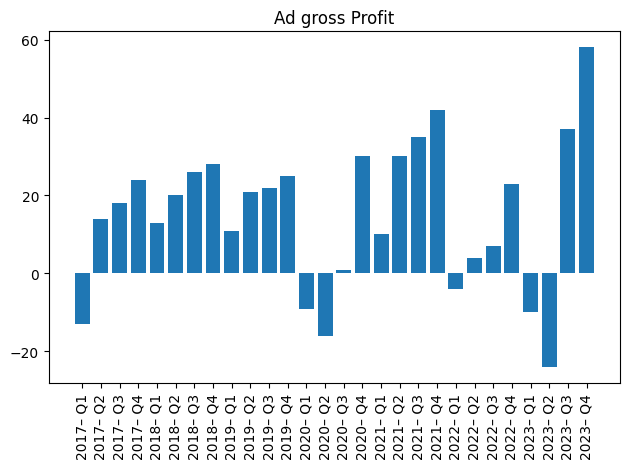

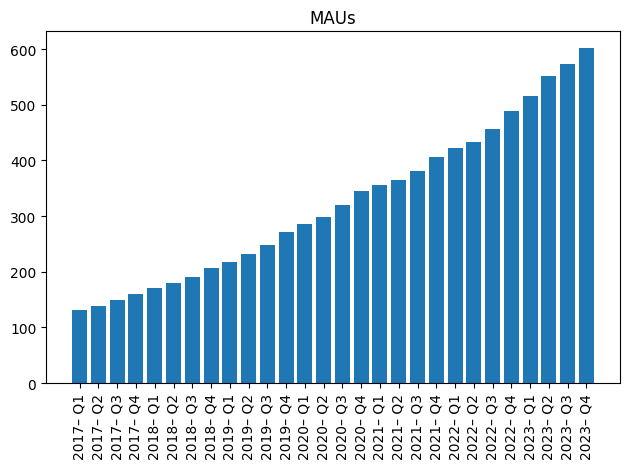

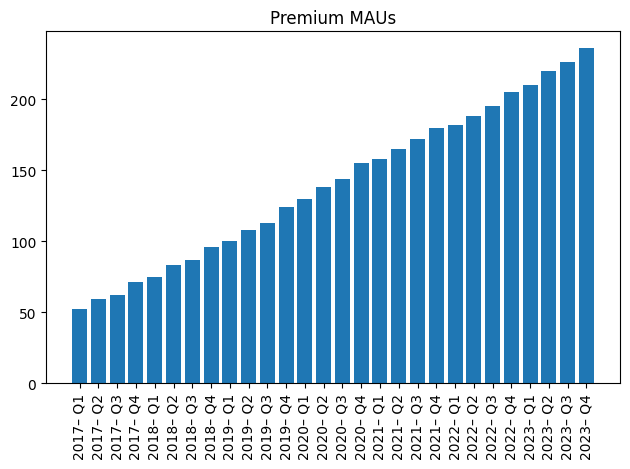

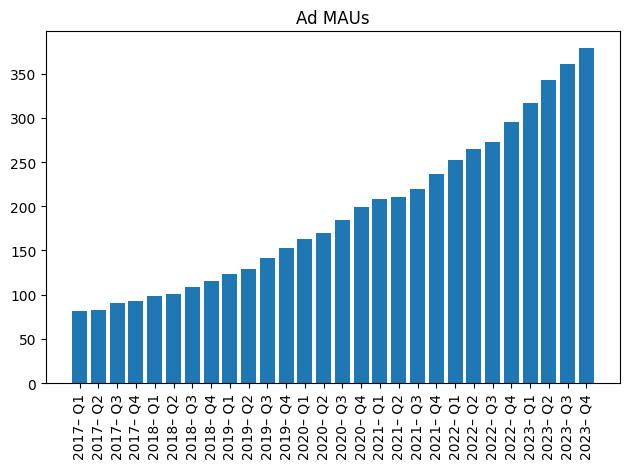

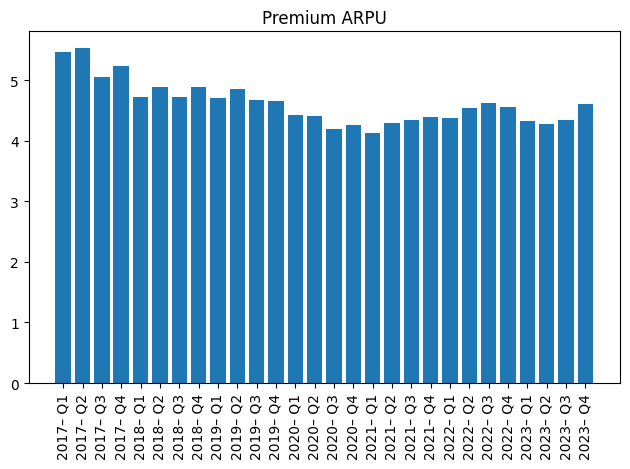

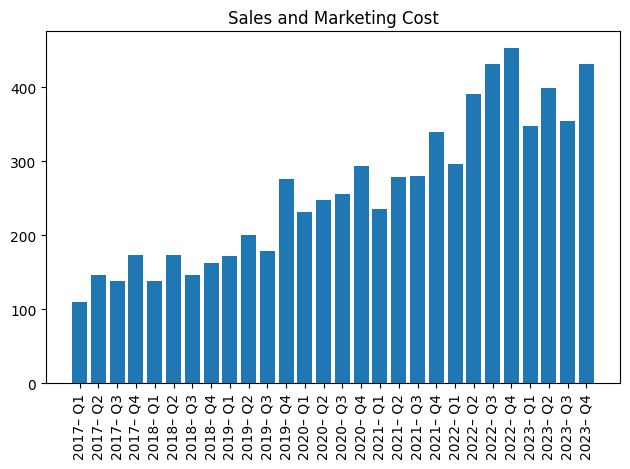

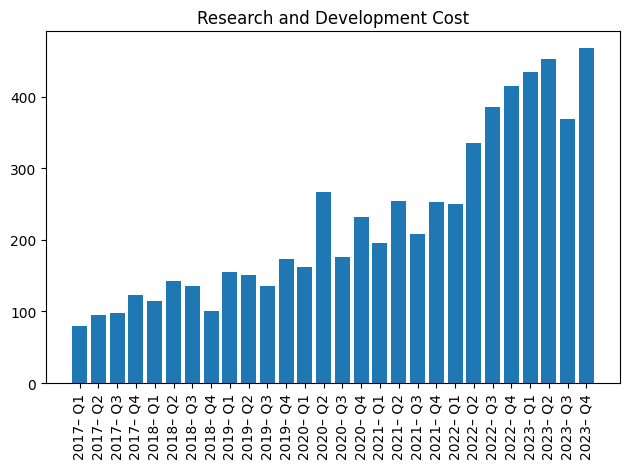

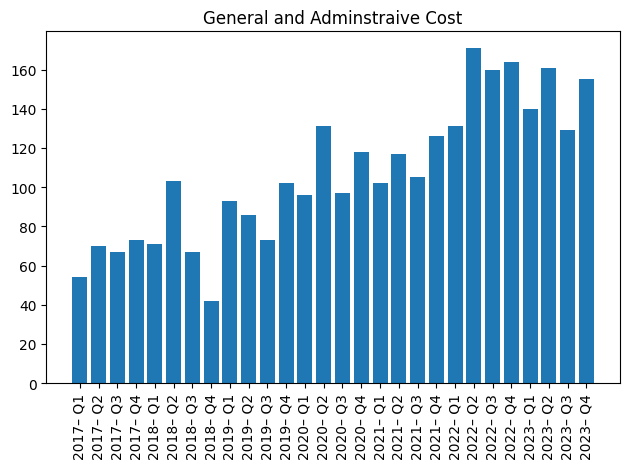

In [4]:
for metric in quarterly_df.columns.drop(['Date', 'Year', 'Quarter']):
    plt.figure()
    plt.bar(quarterly_df['Date'], quarterly_df[metric])
    plt.title(metric)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [46]:
def generate_colors(n):
    color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
    n = min(n, len(color_cycle))

    return color_cycle[:n]

In [47]:
events = {'Event': ['Harry Style\'s Fine Line',
                    'The Weeknd\'s After Hours',
                    'Taylor Swift\'s Fearless'],
          'Date': ['2019-12-13',
                   '2020-03-20',
                   '2021-04-09']}
events_df = pd.DataFrame(events)

generate_colors(len(events_df))

['#1f77b4', '#ff7f0e', '#2ca02c']

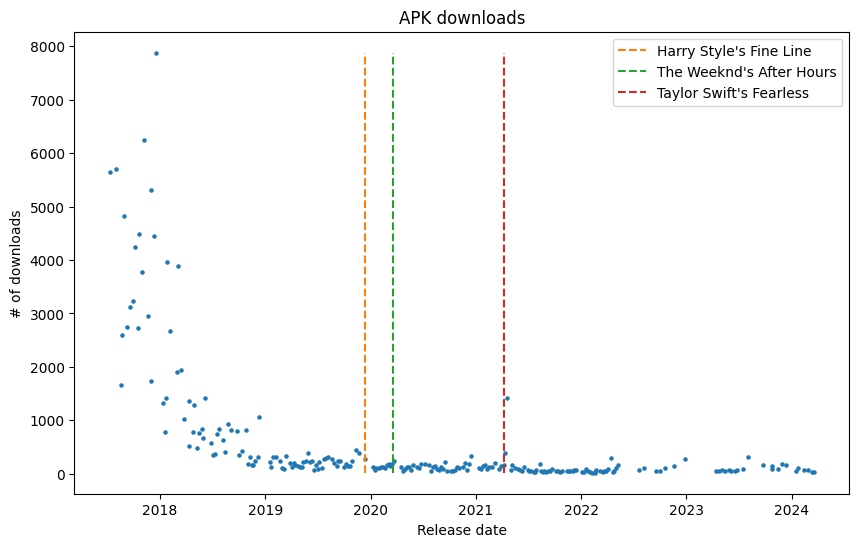

In [49]:
events = {'Event': ['Harry Style\'s Fine Line',
                    'The Weeknd\'s After Hours',
                    'Taylor Swift\'s Fearless'],
          'Date': ['2019-12-13',
                   '2020-03-20',
                   '2021-04-09']}

events_df = pd.DataFrame(events)
events_df['Date'] = pd.to_datetime(events_df['Date'])

ymin = apk_df['Downloads'].min()
ymax = apk_df['Downloads'].max()

colors = generate_colors(len(events_df) + 1)[1:]

plt.figure(figsize=(10, 6))
for index, row in events_df.iterrows():
    plt.vlines(x=row['Date'], ymin=ymin, ymax=ymax, color=colors[index], linestyles='--', label=row['Event'])

plt.scatter(apk_df['Date'], apk_df['Downloads'], marker='o', s=5)
plt.title('APK downloads')
plt.xlabel('Release date')
plt.ylabel('# of downloads')
plt.legend()
plt.show()